In [2]:
import  cv2,os
from PIL import Image 
from PIL import Image, ImageOps 
data_path='E:/project/jahid/our_final_project/digit/dataset_jahid'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [105]:
import numpy as np
import cv2
import os
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
import sklearn.metrics as skmetrics
import random
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import glob
from PIL import ImageTk, Image
from PIL import Image, ImageEnhance
from PIL import Image, ImageFilter 
from PIL import Image, ImageOps

In [106]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('D:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [107]:
img_size=128
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            ret,gray=cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
            resized=cv2.resize(gray,(128,128))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [108]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [109]:
np.save('data',data)
np.save('target',new_target)

In [110]:
print(data.shape, target.shape)

(1629, 128, 128, 1) (1629,)


In [3]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('D:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

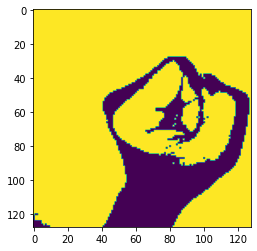

In [6]:
plt.imshow(data[2])

In [7]:
print(target[2])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1303, 128, 128, 1) (326, 128, 128, 1) (1303, 10) (326, 10)


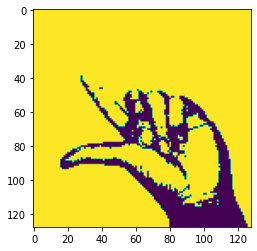

In [117]:
plt.imshow(X_train[0])

In [118]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [119]:
print(X_train[0])

[[[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 ...

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [0.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [0.]
  [1.]
  [1.]]]


In [120]:
feature_extractor = tf.keras.models.Sequential()

feature_extractor.add( tf.keras.layers.Conv2D(filters=16,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=X_train.shape[1:] ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))


feature_extractor.add( tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu' ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

feature_extractor.add( tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu' ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

feature_extractor.add( tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu' ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))
feature_extractor.add(Dropout(rate=0.25))
feature_extractor.add( tf.keras.layers.Flatten())
feature_extractor.add(Dropout(rate=0.50))
feature_extractor.add( tf.keras.layers.Dense(units=256, activation='relu' ))
feature_extractor.add( tf.keras.layers.Dense(units=128, activation='relu' ))
feature_extractor.add(tf.keras.layers.Dense(units=10, activation='softmax' ))

In [121]:
feature_extractor.compile(optimizer='adam',
                  loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [122]:
#Train the CNN model
history = feature_extractor.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
41/41 [==============================] - 5s 114ms/step - loss: 2.2920 - accuracy: 0.1190 - val_loss: 2.1301 - val_accuracy: 0.1840
Epoch 2/20
41/41 [==============================] - 4s 109ms/step - loss: 1.9223 - accuracy: 0.2824 - val_loss: 1.7482 - val_accuracy: 0.3650
Epoch 3/20
41/41 [==============================] - 4s 91ms/step - loss: 1.5812 - accuracy: 0.4160 - val_loss: 1.4146 - val_accuracy: 0.4693
Epoch 4/20
41/41 [==============================] - 4s 87ms/step - loss: 1.2908 - accuracy: 0.5219 - val_loss: 1.1573 - val_accuracy: 0.5736
Epoch 5/20
41/41 [==============================] - 4s 88ms/step - loss: 1.0683 - accuracy: 0.6071 - val_loss: 0.9536 - val_accuracy: 0.7086
Epoch 6/20
41/41 [==============================] - 4s 88ms/step - loss: 0.8719 - accuracy: 0.6876 - val_loss: 0.8558 - val_accuracy: 0.7362
Epoch 7/20
41/41 [==============================] - 4s 88ms/step - loss: 0.7327 - accuracy: 0.7452 - val_loss: 0.8063 - val_accuracy: 0.7239
Epoch 8/20


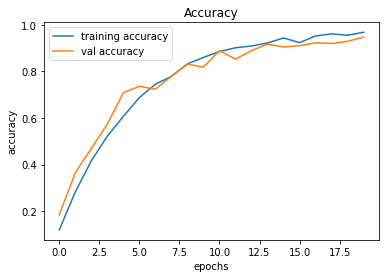

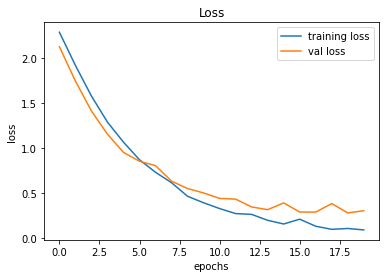

In [123]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [171]:
predictions=feature_extractor.predict(X_test)

In [172]:
print(predictions)

[[3.02041094e-08 8.15306194e-05 3.32521362e-04 ... 9.95260775e-01
  4.16250946e-03 4.17220730e-10]
 [2.70657392e-06 9.93008165e-09 1.05088184e-05 ... 5.44248288e-03
  6.42395811e-03 3.96169952e-07]
 [4.66960526e-10 5.97686300e-16 5.79511425e-06 ... 4.75311630e-12
  1.04513596e-07 2.76256797e-14]
 ...
 [2.42939732e-05 1.11963265e-08 8.80988682e-06 ... 1.20850664e-03
  9.95966554e-01 1.13161471e-08]
 [1.94091119e-12 2.81127316e-26 1.83107728e-17 ... 6.39881925e-10
  2.26715129e-05 2.16839693e-15]
 [8.05209854e-09 3.30848904e-10 1.62420452e-10 ... 1.20326540e-08
  6.46170903e-08 1.39063570e-08]]


In [173]:
print(np.argmax(predictions[0]))

7


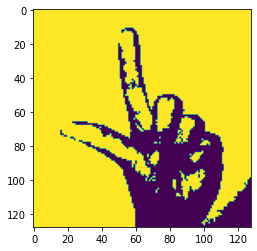

In [174]:
plt.imshow(X_test[0])

In [175]:
img=cv2.imread("testing2/0.JPG")

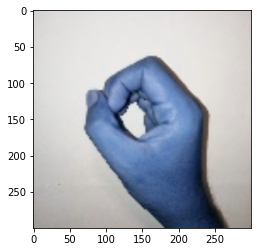

In [176]:
plt.imshow(img)

In [177]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
ret,gray=cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
resized=cv2.resize(gray,(128,128))

In [178]:
newimg=resized/255.0

In [179]:
#newimg=np.array(newimg)/255.0

In [180]:
newimg=np.array(newimg).reshape(-1,128,128,1)

In [181]:
newimg.shape

(1, 128, 128, 1)

In [135]:
predictions=feature_extractor.predict(newimg)

In [136]:
print(np.argmax(predictions))

0


In [137]:
feature_extractor.save("sign_language_model.h5")

In [10]:
from keras.models import load_model
model=load_model('sign_language_model.h5')

In [139]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.3045575022697449
Test accuracy: 0.9478527903556824


In [140]:
X_test = X_test.reshape(-1,128,128,1)
X_train = X_train.reshape(-1,128,128,1)
print(X_test.shape)

(326, 128, 128, 1)


In [141]:
preds = np.round(model.predict(X_test),0)

In [142]:
preds

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [143]:
print(y_test.shape)

(326, 10)


In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
report = classification_report(y_test,preds)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.97      0.97      0.97        31
           2       0.94      0.97      0.96        33
           3       0.97      0.97      0.97        31
           4       0.95      0.83      0.89        24
           5       0.86      1.00      0.93        32
           6       1.00      0.94      0.97        35
           7       0.96      0.76      0.85        34
           8       0.92      1.00      0.96        35
           9       0.97      1.00      0.99        34

   micro avg       0.95      0.95      0.95       326
   macro avg       0.95      0.94      0.95       326
weighted avg       0.95      0.95      0.95       326
 samples avg       0.95      0.95      0.95       326



C:\Users\HP\Music\anaconda21\envs\nahid\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('D:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
1
0.998281


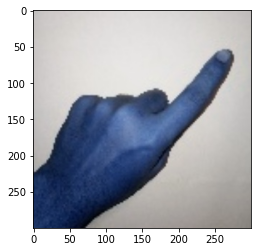

In [12]:
img=cv2.imread("testing2/28.jpg")
plt.imshow(img)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
ret,gray=cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
resized=cv2.resize(gray,(128,128))
newimg=resized/255.0
newimg=np.array(newimg).reshape(-1,128,128,1)
#newimg=newimg.reshape(-1,128,128,1)
#newimg=newimg/255.0
predictions=model.predict(newimg)
pred = model.predict_classes([newimg])[0]
print(pred)
#print(predictions)
p=np.argmax(predictions)
#print(p)
print(predictions[0][p])

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Random Forest Classifier

In [167]:
X_for_RF = model.predict(X_train) 

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [168]:
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [169]:
X_test_feature = model.predict(X_test) 
prediction_RF = RF_model.predict(X_test_feature)

In [170]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))

Accuracy =  0.9386503067484663


# KNN Classifier

In [152]:
X_for_knn = model.predict(X_train)
from sklearn.neighbors import KNeighborsClassifier

In [153]:
knn_model=KNeighborsClassifier(n_neighbors = 7)

In [154]:
knn_model.fit(X_for_knn, y_train)

KNeighborsClassifier(n_neighbors=7)

In [155]:
X_test_feature = model.predict(X_test) 
prediction_knn = knn_model.predict(X_test_feature)

In [156]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_knn))

Accuracy =  0.950920245398773


# Decision Tree Classifier

In [157]:
X_for_dt = model.predict(X_train)
from sklearn.tree import DecisionTreeClassifier

In [158]:
dt_model=DecisionTreeClassifier()

In [159]:
X_for_dt.shape

(1303, 10)

In [160]:
dt_model.fit(X_for_dt, y_train)

DecisionTreeClassifier()

In [161]:
X_test_feature = model.predict(X_test) 
prediction_dt = dt_model.predict(X_test_feature)

In [162]:
X_test_feature.shape

(326, 10)

In [163]:
prediction_dt.shape

(326, 10)

In [164]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_dt))

Accuracy =  0.9355828220858896


In [182]:
model.save("sign_language_model.h5")

In [13]:
import os
import sys
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
from PIL import Image, ImageOps
import pickle
import numpy

In [14]:
from keras.models import load_model
model=load_model('sign_language_model.h5')

In [15]:
classes = {1: 'শূণ্য',
           2: 'এক',
           3: 'দুই',
           4: 'তিন',
           5: 'চার',
           6: 'পাঁচ',
           7: 'ছয়',
           8: 'সাত',
           9: 'আট',
           10: 'নয়'}

In [16]:
top = tk.Tk()
top.geometry('1500x900')
top.title('Sign language digit Predictor')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 18, 'bold'))
sign_image = Label(top)

In [17]:
file_path='E:/project/jahid/final_project/digit3/testing2'

def classify(file_path):
	global label_packed
	image = cv2.imread(file_path)
	gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
	ret,gray=cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
	resized=cv2.resize(gray,(128,128))
#	newimg=tf.keras.utils.normalize(resized,axis=1)
	newimg=resized/255.0
	newimg=np.array(newimg).reshape(-1,128,128,1)
	predictions=model.predict(newimg)
	s=np.argmax(predictions)
	sign=classes[s + 1]  
	s1=predictions[0][s]
	print(s1) 
#	label.configure(foreground='#364196', text=s1)
	#print(np.argmax(predictions))
	print(sign)  
#	label.configure(foreground='#364196', text=s1)
	label.configure(foreground='#364196', text=sign)

In [18]:
def show_classify_button(file_path):
	classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
	classify_b.configure(background='#364196', foreground='white', font=('arial', 10, 'bold'))
	classify_b.place(relx=0.79, rely=0.46)

In [19]:

def upload_image():
	try:
		file_path = filedialog.askopenfilename()
		uploaded = Image.open(file_path)
		uploaded.thumbnail(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))
		im = ImageTk.PhotoImage(uploaded)

		sign_image.configure(image=im)
		sign_image.image = im
		label.configure(text='')
		show_classify_button(file_path)
	except:
		pass

In [20]:
upload = Button(top, text="Upload a sign language image", command=upload_image, padx=10, pady=5)
upload.configure(background='#364196', foreground='white', font=('arial', 10, 'bold'))

upload.pack(side=BOTTOM, pady=70)
sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)
heading = Label(top, text="Predict Your sign language digit", pady=40, font=('Times New Roman', 25, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364196')
heading.pack()
top.mainloop()

1.0
শূণ্য
0.9324481
আট
0.9999857
ছয়
0.9916951
দুই
0.9945539
আট
0.9987883
চার
0.9909372
সাত
0.9909372
সাত
0.48078254
এক
0.9999707
পাঁচ
0.99878234
পাঁচ
0.9991173
আট
0.9995865
তিন
0.9844236
চার
0.99993265
শূণ্য
